In [1]:
import SERfuncs

In [2]:
from __future__ import division
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import graphlab

A newer version of GraphLab Create (v2.1) is available! Your current version is v2.0.1.
You can use pip to upgrade the graphlab-create package. For more information see https://turi.com/products/create/upgrade.


In [57]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(5)
    plt.xticks(tick_marks, ['Sit','StairsUp','StairsDw','Stand','Walk'], rotation=45)
    plt.yticks(tick_marks, ['Sit','StairsUp','StairsDw','Stand','Walk'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
HealthyData = graphlab.SFrame.read_csv('../Datasets/Cbrace/HealthyData.csv')
CBRData = graphlab.SFrame.read_csv('../Datasets/Cbrace/PatientCBRData.csv')
SCOData = graphlab.SFrame.read_csv('../Datasets/Cbrace/PatientSCOData.csv')

This non-commercial license of GraphLab Create for academic use is assigned to llonini@ricres.org and will expire on November 11, 2016.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.0.1 started. Logging: /tmp/graphlab_server_1470330818.log


Finished parsing file /Users/luca/Projects/Datasets/Cbrace/HealthyData.csv

Parsing completed. Parsed 100 lines in 0.308097 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/HealthyData.csv

Parsing completed. Parsed 8375 lines in 0.465772 secs.

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientCBRData.csv

Parsing completed. Parsed 100 lines in 1.11998 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientCBRData.csv

Parsing completed. Parsed 22354 lines in 1.50099 secs.

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientSCOData.csv

Parsing completed. Parsed 100 lines in 0.736119 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientSCOData.csv

Parsing completed. Parsed 18762 lines in 1.03137 secs.

In [4]:
CBRData.head(5)

Columns:
	SubjID	int
	Session	int
	Features_  1	float
	Features_  2	float
	Features_  3	float
	Features_  4	int
	Features_  5	int
	Features_  6	int
	Features_  7	int
	Features_  8	float
	Features_  9	float
	Features_ 10	float
	Features_ 11	float
	Features_ 12	float
	Features_ 13	float
	Features_ 14	float
	Features_ 15	float
	Features_ 16	float
	Features_ 17	float
	Features_ 18	int
	Features_ 19	int
	Features_ 20	int
	Features_ 21	int
	Features_ 22	float
	Features_ 23	float
	Features_ 24	float
	Features_ 25	float
	Features_ 26	float
	Features_ 27	float
	Features_ 28	float
	Features_ 29	float
	Features_ 30	float
	Features_ 31	float
	Features_ 32	int
	Features_ 33	int
	Features_ 34	int
	Features_ 35	int
	Features_ 36	float
	Features_ 37	float
	Features_ 38	float
	Features_ 39	float
	Features_ 40	float
	Features_ 41	float
	Features_ 42	float
	Features_ 43	float
	Features_ 44	float
	Features_ 45	float
	Features_ 46	float
	Features_ 47	float
	Features_ 48	float
	Features_ 49	float
	Features_ 50	float
	Features_ 51	float
	Features_ 52	float
	Features_ 53	float
	Features_ 54	float
	Features_ 55	float
	Features_ 56	float
	Features_ 57	float
	Features_ 58	float
	Features_ 59	float
	Features_ 60	float
	Features_ 61	float
	Features_ 62	float
	Features_ 63	float
	Features_ 64	float
	Features_ 65	float
	Features_ 66	float
	Features_ 67	float
	Features_ 68	float
	Features_ 69	float
	Features_ 70	float
	Features_ 71	float
	Features_ 72	float
	Features_ 73	float
	Features_ 74	float
	Features_ 75	float
	Features_ 76	float
	Features_ 77	float
	Features_ 78	float
	Features_ 79	float
	Features_ 80	float
	Features_ 81	float
	Features_ 82	float
	Features_ 83	float
	Features_ 84	float
	Features_ 85	float
	Features_ 86	float
	Features_ 87	float
	Features_ 88	float
	Features_ 89	float
	Features_ 90	float
	Features_ 91	float
	Features_ 92	float
	Features_ 93	float
	Features_ 94	float
	Features_ 95	float
	Features_ 96	float
	Features_ 97	float
	Features_ 98	float
	Features_ 99	float
	Features_100	float
	Features_101	float
	Features_102	float
	Features_103	float
	Features_104	float
	Features_105	float
	Features_106	float
	Features_107	float
	Features_108	float
	Features_109	float
	Features_110	float
	Features_111	float
	Features_112	float
	Features_113	float
	Features_114	float
	Features_115	float
	Features_116	float
	Features_117	float
	Features_118	float
	Features_119	float
	Features_120	float
	Features_121	float
	Features_122	float
	Features_123	float
	Features_124	float
	Features_125	float
	Features_126	float
	Features_127	float
	Features_128	float
	Features_129	float
	Features_130	float
	Features_131	float
	Label	int

Rows: 5

Data:
+--------+---------+-----------------+--------------+--------------+--------------+
| SubjID | Session |   Features_  1  | Features_  2 | Features_  3 | Features_  4 |
+--------+---------+-----------------+--------------+--------------+--------------+
|   1    |    1    |  0.051382320442 |    0.6076    |    0.196     |      0       |
|   1    |    1    | 0.0253933701657 |    0.6076    |    0.1176    |      0       |
|   1    |    1    | 0.0248519337017 |     0.49     |    0.1176    |      0       |
|   1    |    1    | 0.0465635359116 |    0.3136    |    0.0784    |      0       |
|   1    |    1    | 0.0781834254144 |    0.2352    |    0.0784    |      56      |
+--------+---------+-----------------+--------------+--------------+--------------+
+--------------+--------------+--------------+-----------------+-----------------+
| Features_  5 | Features_  6 | Features_  7 |   Features_  8  |   Features_  9  |
+--------------+--------------+--------------+-----------------+-----------------+
|     181      |      0       |      0       |  0.112454267826 | -0.294668590342 |
|     178      |      3       |      0       | 0.0983200079119 | 0.0523105353163 |
|     181      |      0       |      0       | 0.0841222692085 | -0.592549758023 |
|     181      |      0       |      0       | 0.0654386480834 |  -1.01056633159 |
|     

In [5]:
#SUBJECTS IN THE DATABASE
HealthyCodes = HealthyData['SubjID'].unique()
HealthyCodes = HealthyCodes.sort()
print HealthyCodes
PatientCodes = CBRData['SubjID'].unique()
PatientCodes = PatientCodes.sort()
print PatientCodes

[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
[1, 2, 5, 6, 8, 11, 12, 13, 14, 15, 16, 19]


In [6]:
#LOSO cross validation on healthy

col_names = HealthyData.column_names()
label_cols = col_names[-1:] #the : is used to return a list with one element 
feature_cols = col_names[2:-1]

CVacc = np.zeros(len(HealthyCodes)) 
k = 0
for s in HealthyCodes:
    print 'Test Subject = %s'%s
    #1 subject is test, the rest is used for training
    test = HealthyData[HealthyData['SubjID'] == s]
    train = HealthyData[HealthyData['SubjID'] != s]
    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1) #to squeeze last dimension and obtain a 1D array
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    print 'Train samples = %s, Test samples = %s'%(len(ytrain),len(ytest))
    #train a RF 
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    
    #unbalanced accuracy  - 
    #acc = sum(ypred == ytest)/len(ytest)

    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    CVacc[k] = BAcc

    print 'BACC = %s'%CVacc[k]
    k = k+1
    
print 'mean CVacc = %s'%CVacc.mean()

Test Subject = 51
Train samples = 7371, Test samples = 1004
BACC = 0.807310083554
Test Subject = 52
Train samples = 7666, Test samples = 709
BACC = 0.66044584798
Test Subject = 53
Train samples = 7608, Test samples = 767
BACC = 0.812869240521
Test Subject = 54
Train samples = 7692, Test samples = 683
BACC = 0.634222516361
Test Subject = 55
Train samples = 7668, Test samples = 707
BACC = 0.896106960088
Test Subject = 56
Train samples = 7591, Test samples = 784
BACC = 0.940495809958
Test Subject = 57
Train samples = 7483, Test samples = 892
BACC = 0.799287587864
Test Subject = 58
Train samples = 7617, Test samples = 758
BACC = 0.387067257161
Test Subject = 59
Train samples = 7649, Test samples = 726
BACC = 0.766047178143
Test Subject = 60
Train samples = 7695, Test samples = 680
BACC = 0.778991124057
Test Subject = 61
Train samples = 7710, Test samples = 665
BACC = 0.493972598448
mean CVacc = 0.725165109467


In [7]:
#display the Confusion Matrix for one subject
#labels=["sitting", "stairs dw", "stairs up", "standing", "walking"])
cmat = confusion_matrix(ytest, ypred)
#print cmat
totals = cmat.sum(axis=1)
totals = np.tile(totals,(5,1))
totals = totals.T
cmat = cmat/totals
print cmat

[[ 0.          0.          0.          1.          0.        ]
 [ 0.01612903  0.77419355  0.12903226  0.          0.08064516]
 [ 0.02409639  0.02409639  0.90361446  0.01204819  0.03614458]
 [ 0.58189655  0.          0.          0.36637931  0.05172414]
 [ 0.          0.47972973  0.08783784  0.00675676  0.42567568]]


 Most of the errors come from sitting being confounded with standing and viceversa

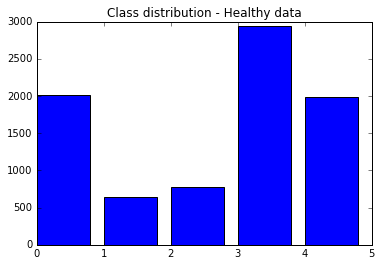

In [14]:
labels = HealthyData['Label']
classes,unique_counts = np.unique(labels,return_counts=True)
plt.bar(classes,unique_counts)
plt.title('Class distribution - Healthy data')

## Train on Healthy and test on CBR patients
* Keep one session out (later used for target) and compute mean error

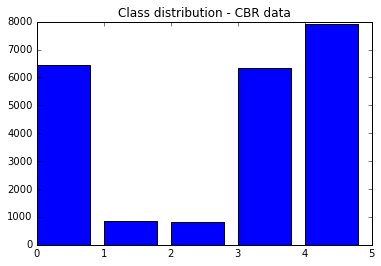

In [113]:
labels = CBRData['Label']
classes,unique_counts = np.unique(labels,return_counts=True)
plt.bar(classes,unique_counts)
plt.title('Class distribution - CBR data')

In [110]:
Xtrain = HealthyData.select_columns(feature_cols).to_numpy()
ytrain = HealthyData.select_columns(label_cols).to_numpy()
ytrain = ytrain.reshape(-1) #to squeeze last dimension and obtain a 1D array

RF = RandomForestClassifier(n_estimators=50)
RF = RF.fit(Xtrain,ytrain)

cmat_subj = [] #confusion matrix for each subject (a list)
acc_class_subj = [] #accuracy per class for each subject

#test on each patient (CBR)
PatientCodes = np.array([1, 2, 5, 6, 8, 11, 14, 15, 16, 19]) #all patient with 4 sessions in CBR 
CVacc = np.zeros(len(PatientCodes))
k = 0

for s in PatientCodes:
    test = CBRData[(CBRData['SubjID'] == s)  & (CBRData['Session'] != 1)] #keep out one session (used later for target)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1) #to squeeze last dimension and obtain a 1D array
    Nclasses = len(np.unique(ytest))
    print 'Test on Patient {}, Nclasses test = {}'.format(s,Nclasses)
    print 'Train samples = {}, Test samples = {}'.format(len(ytrain),len(ytest))
    ypred = RF.predict(Xtest)

    #    acc = sum(ypred == ytest)
    #    CVacc[k] = acc/len(ytest)

    #balanced accuracy
    acc_c = 0
    acc_class = np.zeros(5) #the accuracy per class
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_class[c] = sum(correct)/len(correct)
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/Nclasses
    CVacc[k] = BAcc
    acc_class_subj.append(acc_class)

    print 'BAcc = {:.2f}, Acc per class = {}\n'.format(CVacc[k],np.around(acc_class,2))
    k = k+1
    
    #compute confusion matrix and save results
    #labels=["sitting", "stairs dw", "stairs up", "standing", "walking"])
    Nclass_pred = len(np.unique(ypred))
    cmat = confusion_matrix(ytest, ypred)
    totals = cmat.sum(axis=1)
    totals = np.tile(totals,(max(Nclass_pred,Nclasses),1))
    totals = totals.T
    cmat = cmat/totals
    cmat_subj.append(cmat)

print '\nmean acc Source only = %s'%CVacc.mean()


Test on Patient 1, Nclasses test = 5
Train samples = 8375, Test samples = 1177
BAcc = 0.47, Acc per class = [ 0.9   0.    0.74  0.36  0.33]

Test on Patient 2, Nclasses test = 5
Train samples = 8375, Test samples = 1228
BAcc = 0.37, Acc per class = [ 0.77  0.    0.39  0.55  0.16]

Test on Patient 5, Nclasses test = 5
Train samples = 8375, Test samples = 1468
BAcc = 0.46, Acc per class = [ 0.76  0.01  0.68  0.81  0.06]

Test on Patient 6, Nclasses test = 5
Train samples = 8375, Test samples = 2246
BAcc = 0.61, Acc per class = [ 0.93  0.24  0.76  0.91  0.2 ]

Test on Patient 8, Nclasses test = 5
Train samples = 8375, Test samples = 926
BAcc = 0.29, Acc per class = [ 0.9   0.    0.47  0.01  0.05]

Test on Patient 11, Nclasses test = 5
Train samples = 8375, Test samples = 1207
BAcc = 0.51, Acc per class = [ 0.71  0.18  0.71  0.71  0.24]

Test on Patient 14, Nclasses test = 5
Train samples = 8375, Test samples = 1527
BAcc = 0.50, Acc per class = [ 0.67  0.    0.11  0.88  0.85]

Test on Pati

<function matplotlib.pyplot.show>

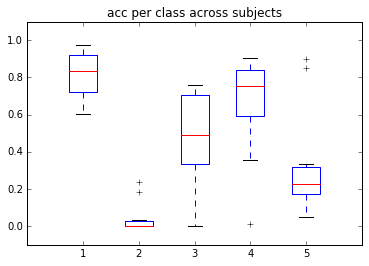

In [111]:
a= np.asarray(acc_class_subj)
plt.boxplot(a)
plt.axis([0,6,-0.1,1.1])
plt.title('acc per class across subjects')
plt.show

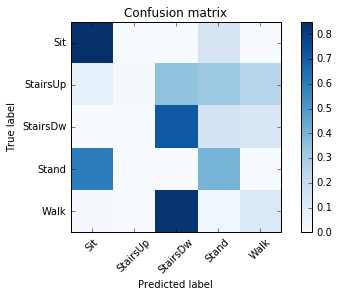

In [76]:
plot_confusion_matrix(cmat_subj[0])

In [70]:
cmat_subj[0]

array([[ 0.85028249,  0.        ,  0.        ,  0.14971751,  0.        ],
       [ 0.07291667,  0.01041667,  0.34375   ,  0.32291667,  0.25      ],
       [ 0.        ,  0.        ,  0.71578947,  0.15789474,  0.12631579],
       [ 0.59813084,  0.        ,  0.        ,  0.40186916,  0.        ],
       [ 0.00952381,  0.        ,  0.83492063,  0.03492063,  0.12063492]])

## Train a forest on Target data only

In [100]:
Nsessions_used = 1
TOacc = np.zeros(len(PatientCodes))
TOacc_all = np.zeros((len(PatientCodes),Nsessions_used)) #the accuracy for each target session used as training
Ntarget = np.zeros((len(PatientCodes),Nsessions_used)) #the # of target data points in each target session

cmat_subj = [] #confusion matrix for each subject (a list)
acc_class_subj = [] #accuracy per class for each subject
k = 0
session = 0

for s in PatientCodes:
    #for session in range(3,4):
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(test['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    Ntarget[k,session] = len(ytarget)

    RF = RandomForestClassifier(n_estimators=100,criterion='entropy')
    RF = RF.fit(Xtarget,ytarget)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)

    #balanced accuracy
    acc_c = 0
    acc_class = np.zeros(5) #the accuracy per class
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_class[c] = sum(correct)/len(correct)
        acc_c += sum(correct)/len(correct)
        
    BAcc = acc_c/len(np.unique(ytest))
    TOacc_all[k,session] = BAcc 
    acc_class_subj.append(acc_class)
    TOacc[k] = TOacc_all[k,:].mean()
    
    print 'Patient {}, Nclass test = {}, BAcc - Target only = {:.2f}, Acc per class = {}\n'.format(s,Nclasses,TOacc[k],np.around(acc_class,2))
    k = k+1

print '\nmean acc Target only = {:.2f}'.format(TOacc.mean())

Patient 1, Nclass test = 5, BAcc - Target only = 0.78, Acc per class = [ 1.    0.59  0.56  0.98  0.78]

Patient 2, Nclass test = 5, BAcc - Target only = 0.54, Acc per class = [ 0.99  0.52  0.36  0.    0.83]

Patient 5, Nclass test = 5, BAcc - Target only = 0.65, Acc per class = [ 0.95  0.03  0.64  0.7   0.95]

Patient 6, Nclass test = 5, BAcc - Target only = 0.57, Acc per class = [ 0.95  0.03  0.    0.9   0.97]

Patient 8, Nclass test = 5, BAcc - Target only = 0.53, Acc per class = [ 0.98  0.    0.    0.72  0.97]

Patient 11, Nclass test = 5, BAcc - Target only = 0.50, Acc per class = [ 0.81  0.    0.    0.7   0.99]

Patient 14, Nclass test = 5, BAcc - Target only = 0.57, Acc per class = [ 1.    0.    0.    0.83  0.99]

Patient 15, Nclass test = 5, BAcc - Target only = 0.58, Acc per class = [ 0.97  0.    0.    0.97  0.98]

Patient 16, Nclass test = 5, BAcc - Target only = 0.61, Acc per class = [ 0.69  0.14  0.6   0.98  0.66]

Patient 19, Nclass test = 3, BAcc - Target only = 0.68, Acc 

<function matplotlib.pyplot.show>

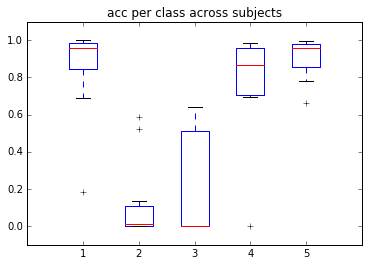

In [107]:
plt.boxplot(np.asarray(acc_class_subj))
plt.title('acc per class across subjects')
plt.axis([0,6,-0.1,1.1])
plt.show

## Now test the SER - Use one session of data from each patient as target and the remaining as his test
* CV error on each session

In [114]:
Nsessions_used = 1 #number of target sessions used to test 
session = 0 #if only 1 target session is used

SOacc = np.zeros(len(PatientCodes)) #to store err when using source only
SERacc = np.zeros(len(PatientCodes)) #to store err when using source + Target with SER
SOacc_all = np.zeros((len(PatientCodes),Nsessions_used)) #to store err when using source only (different target sessions) 
SERacc_all = np.zeros((len(PatientCodes),Nsessions_used)) #to store err when using source + Target with SER (different target sessions)
k = 0

cmat_subj = [] #confusion matrix for each subject (a list)
acc_class_subj = [] #accuracy per class for each subject

#train forest on healthy (Source)
Xtrain = HealthyData.select_columns(feature_cols).to_numpy()
ytrain = HealthyData.select_columns(label_cols).to_numpy()
ytrain = ytrain.reshape(-1) #to squeeze last dimension and obtain a 1D array
RF = RandomForestClassifier(n_estimators=100,criterion='entropy')
RF = RF.fit(Xtrain,ytrain)

for s in PatientCodes:
    #loop through target sessions (use one as target)
    #for session in range(4):
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(test['Label'].unique()) #How many activities we have for this patient in test

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)

    #predicting using only source data
    ypred = RF.predict(Xtest)
    #correct = sum(ypred == ytest)
    #SOacc_all[k,session] = correct/len(ytest)

    #balanced accuracy (Source only)
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    SOacc_all[k,session] = acc_c/len(np.unique(ytest))

    #combining source w target data
    newRF = SERfuncs.forest_convert(RF)
    expRF = SERfuncs.forest_SER(newRF,Xtarget,ytarget,C=5) #refine RF on current data (C is the # of classes on the source)
    ypred = np.asarray(map(lambda x:SERfuncs.forest_classify_ensemble(expRF,x),Xtest))
    
    #correct = sum(ypred == ytest)
    #SERacc_all[k,session] = correct/len(ytest)
    
    #balanced accuracy
    acc_c = 0
    acc_class = np.zeros(5) #the accuracy per class
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
        acc_class[c] = sum(correct)/len(correct)

    acc_class_subj.append(acc_class)    
    SERacc_all[k,session] = acc_c/len(np.unique(ytest))

    #mean accuracy across sessions    
    SOacc[k] = SOacc_all[k,:].mean()
    SERacc[k] = SERacc_all[k,:].mean()

    print 'Test on Patient %s,  '%s
    print '# of classes in test = %s'%Nclasses
    print 'Source samples = %s, Target samples = %s, Test samples = %s'%(len(ytrain),len(ytarget),len(ytest))
    print 'Source Only={:.2f}, Target Only={:.2f}, SER={:.2f} Acc/class={}'.format(SOacc[k],TOacc[k],SERacc[k],acc_class)
    
    k = k+1

print '\nmean Acc - Source only = %s'%SOacc.mean()
print 'mean Acc - Target only = %s'%TOacc.mean()
print 'mean Acc - SER = %s'%SERacc.mean()

Test on Patient 1,  
# of classes in test = 5
Source samples = 8375, Target samples = 501, Test samples = 1177
Source Only=0.51, Target Only=0.78, SER=0.66 Acc/class=[ 0.94074074  0.10526316  0.64705882  0.96605744  0.65988372]
Test on Patient 2,  
# of classes in test = 5
Source samples = 8375, Target samples = 230, Test samples = 1228
Source Only=0.35, Target Only=0.54, SER=0.40 Acc/class=[ 0.73239437  0.          0.34090909  0.57177616  0.34624146]
Test on Patient 5,  
# of classes in test = 5
Source samples = 8375, Target samples = 305, Test samples = 1468
Source Only=0.46, Target Only=0.65, SER=0.51 Acc/class=[ 0.73490814  0.00806452  0.41975309  0.79509632  0.58842444]
Test on Patient 6,  
# of classes in test = 5
Source samples = 8375, Target samples = 670, Test samples = 2246
Source Only=0.65, Target Only=0.57, SER=0.69 Acc/class=[ 0.93115318  0.31944444  0.30434783  0.91458027  0.95618557]
Test on Patient 8,  
# of classes in test = 5
Source samples = 8375, Target samples = 28

<function matplotlib.pyplot.show>

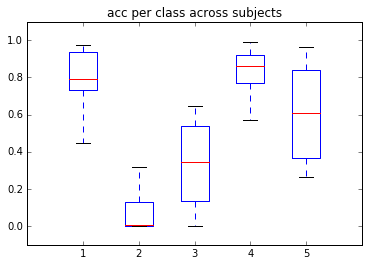

In [115]:
plt.boxplot(np.asarray(acc_class_subj))
plt.title('acc per class across subjects')
plt.axis([0,6,-0.1,1.1])
plt.show

<function matplotlib.pyplot.show>

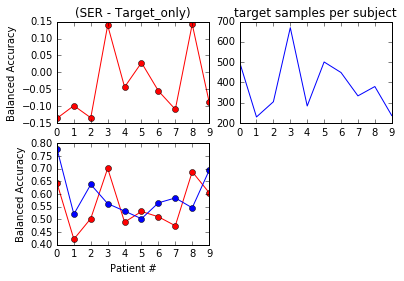

In [106]:
plt.figure(1)
plt.subplot(221)
plt.plot(SERacc-TOacc,'ro-')
plt.xlabel('Patient #')
plt.ylabel('Balanced Accuracy')
plt.title('(SER - Target_only)')

plt.subplot(223)
plt.plot(SERacc,'ro-',TOacc,'bo-')
plt.xlabel('Patient #')
plt.ylabel('Balanced Accuracy')
#plt.legend(['w SER','Target only'])

plt.subplot(222)
plt.plot(Ntarget)
plt.title('target samples per subject')
plt.show

## Train on Source (Healthy) + Target

In [54]:
XHealthy = HealthyData.select_columns(feature_cols).to_numpy()
yHealthy = HealthyData.select_columns(label_cols).to_numpy()
yHealthy = yHealthy.reshape(-1) #to squeeze last dimension and obtain a 1D array
SaTacc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)

    Xtrain = np.concatenate((XHealthy,Xtarget),axis=0)
    ytrain = np.concatenate((yHealthy,ytarget),axis=0)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    SaTacc[k] = BAcc
    print 'Patient %s, BAcc = %s'%(s,SaTacc[k])
    k = k+1

print 'Mean BAcc using Source + Target = %s'%SaTacc.mean()

Patient 1, BAcc = 0.734037168364
Patient 2, BAcc = 0.423518372406
Patient 5, BAcc = 0.528363990575
Patient 6, BAcc = 0.619051650027
Patient 8, BAcc = 0.518096439157
Patient 11, BAcc = 0.550120727058
Patient 14, BAcc = 0.552199311132
Patient 15, BAcc = 0.535050986683
Patient 16, BAcc = 0.676307113305
Patient 19, BAcc = 0.50103847815
Mean BAcc using Source + Target = 0.563778423686


In [55]:
SOacc = np.expand_dims(SOacc, axis=1)
TOacc = np.expand_dims(TOacc, axis=1)
SaTacc = np.expand_dims(SaTacc, axis=1)
SERacc = np.expand_dims(SERacc, axis=1)

AccAll = np.concatenate((SOacc,TOacc,SaTacc,SERacc),axis=1)
print AccAll

[[ 0.47027668  0.80493594  0.73403717  0.65589653]
 [ 0.34356476  0.55678455  0.42351837  0.36069061]
 [ 0.46302359  0.65397866  0.52836399  0.51038908]
 [ 0.58641984  0.5540376   0.61905165  0.86269511]
 [ 0.3006138   0.53447017  0.51809644  0.65068006]
 [ 0.52889891  0.49851557  0.55012073  0.88847613]
 [ 0.49995839  0.56545491  0.55219931  0.85183507]
 [ 0.44732281  0.58181326  0.53505099  0.76520909]
 [ 0.66877704  0.5580145   0.67630711  0.72132396]
 [ 0.50256238  0.70601932  0.50103848  0.46540353]]


<function matplotlib.pyplot.show>

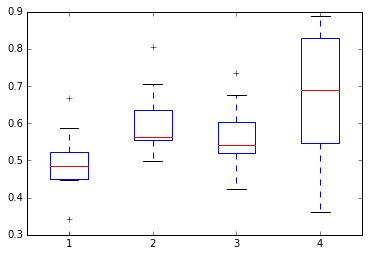

In [56]:
plt.boxplot(AccAll)
plt.show

# Classifier Specificity paper tests
* Note: Patients currently used are 1 2 5 6 8 11 14 15 16 19
* Current paper draft: Sessions 1,2,3 CBR are used for testing, Session 4 CBR as target
* **Impairment Specific**: is trained on all but one SCO and tested on the remaining CBR patient
* **Patient Specific**: is trained on all SCO data (for that patient) and tested on Sessions 1,2,3 of CBR for the same patients
* **Device-Specific**: trained using Leave One Session Out across sessions 1,2,3 of CBR data for that patient. That means the model is trained on Sessions 1,2 and tested on 3 (and then cycles through the combinations). Session 4 was left out for target data.

In [139]:
PatientCodes = np.array([1, 2, 5, 6, 8, 11, 14, 15, 16, 19])

## Impairment specific model (Leave one subject out)

In [58]:
ISpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] != s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)] #test on 3 CBR sessions
    Nclasses = len(train['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    ISpec_acc[k] = BAcc
    print 'Patient %s, Impairment specific (SCO) model - BAcc = %s'%(s,ISpec_acc[k])
    k = k+1

print 'Mean BAcc - Impairment Specific (SCO) = %s'%ISpec_acc.mean()    

Patient 1, Impairment specific (SCO) model - BAcc = 0.543984111501
Patient 2, Impairment specific (SCO) model - BAcc = 0.497768337469
Patient 5, Impairment specific (SCO) model - BAcc = 0.488253786099
Patient 6, Impairment specific (SCO) model - BAcc = 0.550538747842
Patient 8, Impairment specific (SCO) model - BAcc = 0.46746662647
Patient 11, Impairment specific (SCO) model - BAcc = 0.543220688805
Patient 14, Impairment specific (SCO) model - BAcc = 0.58054560037
Patient 15, Impairment specific (SCO) model - BAcc = 0.571897224455
Patient 16, Impairment specific (SCO) model - BAcc = 0.544442163861
Patient 19, Impairment specific (SCO) model - BAcc = 0.883598427716
Mean BAcc - Impairment Specific (SCO) = 0.567171571459


## Train on SCO and test on CBR (Patient Specific model) 

In [74]:
PSpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] == s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)]
    Nclasses = len(test['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    PSpec_acc[k] = BAcc
    print 'Patient %s, Nclasses = %s, Personal model (Trained on SCO) - BAcc = %s'%(s,Nclasses,PSpec_acc[k])
    k = k+1

print 'Mean BAcc - Patient Specific (SCO) = %s'%PSpec_acc.mean()    

Patient 1, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.690657930136
Patient 2, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.514201316211
Patient 5, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.641250439644
Patient 6, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.539390667014
Patient 8, Nclasses = 3, Personal model (Trained on SCO) - BAcc = 0.712432565372
Patient 11, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.48350570923
Patient 14, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.489253976453
Patient 15, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.413609989896
Patient 16, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.489487962491
Patient 19, Nclasses = 3, Personal model (Trained on SCO) - BAcc = 0.780840989076
Mean BAcc - Patient Specific (SCO) = 0.575463154552


## Train and test on CBR - Device specific model (CBR)
* Leave One Session Out of CBR 
* Keep out 1 session (#4) for target

In [65]:
DSpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    data =  CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)] #keep out 1 session for target
    BAcc = 0
    for session in range(1,4):
                  
        test = data[data['Session'] == session]
        train = data[data['Session'] != session]
    
        Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

        Xtrain = train.select_columns(feature_cols).to_numpy()
        ytrain = train.select_columns(label_cols).to_numpy()
        ytrain = ytrain.reshape(-1)
        Xtest = test.select_columns(feature_cols).to_numpy()
        ytest = test.select_columns(label_cols).to_numpy()
        ytest = ytest.reshape(-1)

        RF = RandomForestClassifier(n_estimators=50)
        RF = RF.fit(Xtrain,ytrain)
        ypred = RF.predict(Xtest)
        #acc = sum(ypred == ytest)/len(ytest)
        #balanced accuracy
        acc_c = 0
        for c in np.unique(ytest):
            i = ytest == c
            correct = ypred[i] == ytest[i]
            acc_c += sum(correct)/len(correct)

        BAcc += acc_c/len(np.unique(ytest)) #for current session
        
    DSpec_acc[k] = BAcc/3 #the CV BAcc on 3 session 
    print 'Patient %s, Device Specific model - BAcc = %s'%(s,DSpec_acc[k])
    k = k+1

print 'Mean BAcc - Device Specific (CBR) = %s'%DSpec_acc.mean()    

Patient 1, Device Specific model - BAcc = 0.803518022125
Patient 2, Device Specific model - BAcc = 0.651113329939
Patient 5, Device Specific model - BAcc = 0.629395231577
Patient 6, Device Specific model - BAcc = 0.594012604338
Patient 8, Device Specific model - BAcc = 0.881942741734
Patient 11, Device Specific model - BAcc = 0.733450526503
Patient 14, Device Specific model - BAcc = 0.84999289801
Patient 15, Device Specific model - BAcc = 0.830651274766
Patient 16, Device Specific model - BAcc = 0.661073852136
Patient 19, Device Specific model - BAcc = 0.751907231714
Mean BAcc - Device Specific (CBR) = 0.738705771284


## Can we boost an impairment-specific model with the Device data?

In [71]:
ISpecSER_acc = np.zeros(len(PatientCodes)) 
ISpecSO_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] != s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)] #test on 3 CBR sessions
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 4)] 

    Nclasses = len(train['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    
    #balanced accuracy - Source only
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)    
    ISpecSO_acc[k] = acc_c/len(np.unique(ytest))
    
    #combining source w target data
    newRF = SERfuncs.forest_convert(RF)
    expRF = SERfuncs.forest_SER(newRF,Xtarget,ytarget,C=Nclasses) #refine RF on current data (C is the # of classes on the source)
      
    #balanced accuracy
    acc_c = 0
    ypred = np.asarray(map(lambda x:SERfuncs.forest_classify_ensemble(expRF,x),Xtest))
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    BAcc = acc_c/len(np.unique(ytest))
    ISpecSER_acc[k] = BAcc
        
    print 'Patient %s, BAcc Impairment specific only = %s, Bacc w SER = %s'%(s,ISpecSO_acc[k],ISpecSER_acc[k])
    k = k+1

print 'Mean BAcc - Impairment Specific only = %s'%ISpecSO_acc.mean()    
print 'Mean BAcc - Impairment Specific w SER = %s'%ISpecSER_acc.mean()    

Patient 1, BAcc Impairment specific only = 0.57835963364, Bacc w SER = 0.595887038601
Patient 2, BAcc Impairment specific only = 0.496082636568, Bacc w SER = 0.501462995569
Patient 5, BAcc Impairment specific only = 0.482115943604, Bacc w SER = 0.498647282775
Patient 6, BAcc Impairment specific only = 0.563228464701, Bacc w SER = 0.612659708275
Patient 8, BAcc Impairment specific only = 0.46743938817, Bacc w SER = 0.752075664297
Patient 11, BAcc Impairment specific only = 0.545551923753, Bacc w SER = 0.559630930743
Patient 14, BAcc Impairment specific only = 0.616396651843, Bacc w SER = 0.616396651843
Patient 15, BAcc Impairment specific only = 0.588985299386, Bacc w SER = 0.617322711911
Patient 16, BAcc Impairment specific only = 0.532580984444, Bacc w SER = 0.540313477055
Patient 19, BAcc Impairment specific only = 0.891267425385, Bacc w SER = 0.891267425385
Mean BAcc - Impairment Specific only = 0.576200835149
Mean BAcc - Impairment Specific w SER = 0.618566388645


No significant boost 

<function matplotlib.pyplot.show>

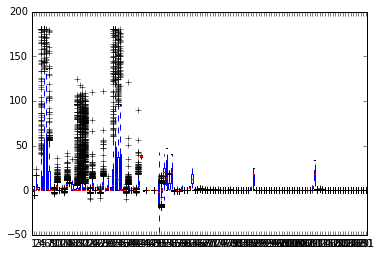

In [75]:
plt.boxplot(Xtrain)
plt.show
